In [71]:
import spynnaker.pyNN as p
import numpy as np
from breakout_utils.dealing_with_neuron_ids import *
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
# Setup pyNN simulation
p.setup(timestep=1.0)

0

In [73]:
# Parameters
cell_params_lif = {'cm': 0.25,
                   'i_offset': 0.0,
                   'tau_m': 20.0,
                   'tau_refrac': 2.0,
                   'tau_syn_E': 5.0,
                   'tau_syn_I': 5.0,
                   'v_reset': -70.0,
                   'v_rest': -65.0,
                   'v_thresh': -50.0
                   }

weight_to_spike = .7
delay = 1
pool_size = 8

In [74]:
p1 = p.Population(1, p.IF_curr_exp, cell_params_lif)

In [75]:
spikeArray = {'spike_times': [0, 10, 40, 45, 60, 63, 65, 80, 85]}

# Input populations
input_p1 = p.Population(1, p.SpikeSourceArray, spikeArray,label='inputSpikes_p1')

In [76]:
p.Projection(input_p1, p1, p.OneToOneConnector(weight_to_spike, delay),  label='input_p1->1')

projection input_p1->1

In [77]:
p1.record_v()
p1.record_gsyn()
p1.record()

In [78]:
p.run(100)

Allocating virtual identifiers
|0                           50%                         100%|
Partitioning graph vertices
|0                           50%                         100%|
Partitioning graph edges
|0                           50%                         100%|
Generating partitioner report
|0                           50%                         100%|
Filtering edges
|0                           50%                         100%|
Placing graph vertices
|0                           50%                         100%|
Generating placement report
|0                           50%                         100%|
Generating placement by core report
|0                           50%                         100%|
Generating SDRAM usage report
|0                           50%                         100%|
Routing
|0                           50%                         100%|
Allocating tags
|0                           50%                         100%|
Reporting Tags
|0                   

In [79]:
v_p1 = p1.get_v(compatible_output=True)
gsyn_p1 = p1.get_gsyn(compatible_output=True)
spikes_p1 = p1.getSpikes(compatible_output=True)
p.end()

Getting membrane voltage for Population 0
|0                           50%                         100%|
Getting conductance for Population 0
|0                           50%                         100%|
Getting spikes for Population 0
|0                           50%                         100%|
Getting provenance data from machine graph
|0                           50%                         100%|
Getting provenance data
|0                           50%                         100%|
Getting Router Provenance
|0                           50%                         100%|
Extracting IOBUF
|0                           50%                         100%|


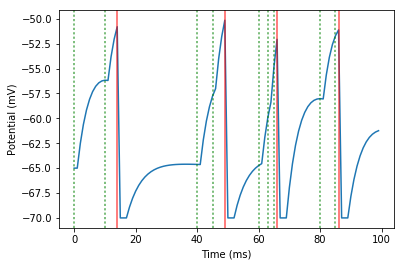

In [85]:
plt.plot(v_p1[:, 2])
for input_t in spikeArray['spike_times']:
    plt.axvline(input_t, ls=':', c='g', lw=2, alpha=.5)
for t in spikes_p1[:,1]:
    plt.axvline(t, ls='-', c='r', lw=2, alpha=.5)
plt.title("")
plt.ylabel("Potential (mV)")
plt.xlabel("Time (ms)")

In [81]:
spikes_p1

array([[  0.,  14.],
       [  0.,  49.],
       [  0.,  66.],
       [  0.,  86.]])